In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import config
from a_star import Node
from a_star import run_a_star
from bresenham import make_line
from cost_functions import total_marginal_costs, fixed_vehicle_costs
from viz import display_array_with_path, set_size

In [2]:
# Import the costmap from demo_riskmap.csv
costmap = np.genfromtxt('demo_riskmap.csv', delimiter=',')

In [3]:
costmap.shape

(519, 431)

In [4]:
# path, cost_real, cost_img, cumdist, time = run_a_star(costmap, (340, 80), (150, 430))
# display_array_with_path(costmap, path, cmap='Reds')
# print('Path cost: £', cost_real + cost_img)
# print('\t Real cost: £', cost_real)
# print('\t Imaginary cost: £', cost_img)
# print('Path length: ', cumdist, ' metres')
# print('Path time: ', time, ' seconds')

Running A* for  current
Risk: 4.860719637600001e-06


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/aliaksei/PycharmProjects/VpfPF/viz.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Direct path cost: £ 257.8561191448928
	 Real cost: £ 58.315630916452776
	 Imaginary cost: £ 199.54048822843998
Direct path length:  23894.76930208785  metres
Direct path time:  853.3846179317089  seconds


/home/aliaksei/PycharmProjects/VpfPF/viz.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Path cost: £ 78.36821808682213
	 Real cost: £ 67.14967716324132
	 Imaginary cost: £ 11.218540923580798
Path length:  28174.23807215873  metres
Path time:  1006.2227882913832  seconds
Running A* for  tipping_point


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Risk: 2.1803077941798023e-07


/home/aliaksei/PycharmProjects/VpfPF/viz.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Direct path cost: £ 203.00551522100693
	 Real cost: £ 3.465026992566944
	 Imaginary cost: £ 199.54048822843998
Direct path length:  23894.76930208785  metres
Direct path time:  853.3846179317089  seconds


/home/aliaksei/PycharmProjects/VpfPF/viz.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Path cost: £ 5.060397425417644
	 Real cost: £ 4.557182386520947
	 Imaginary cost: £ 0.5032150388966978
Path length:  38352.61469056612  metres
Path time:  1369.73623894879  seconds
Running A* for  future


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Risk: 4.907358070420599e-07


/home/aliaksei/PycharmProjects/VpfPF/viz.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Direct path cost: £ 213.7223854234234
	 Real cost: £ 14.181897194983414
	 Imaginary cost: £ 199.54048822843998
Direct path length:  23894.76930208785  metres
Direct path time:  853.3846179317089  seconds


/home/aliaksei/PycharmProjects/VpfPF/viz.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Path cost: £ 17.721625910005315
	 Real cost: £ 16.589007667352238
	 Imaginary cost: £ 1.1326182426530753
Path length:  34973.06058209783  metres
Path time:  1249.0378779320654  seconds


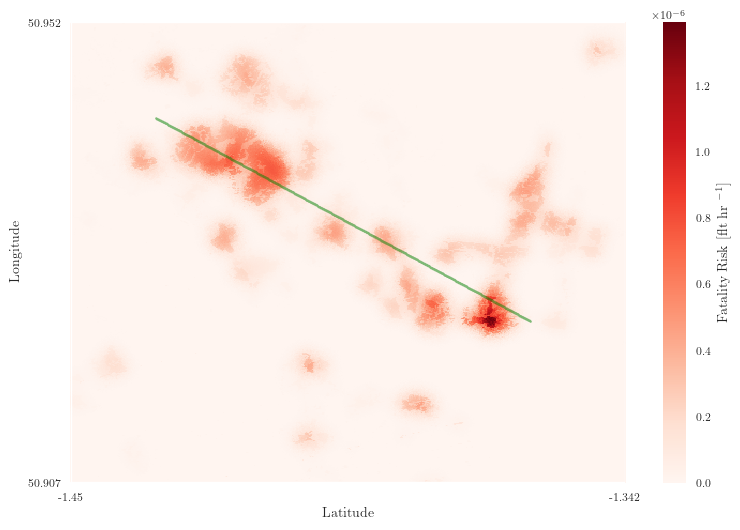

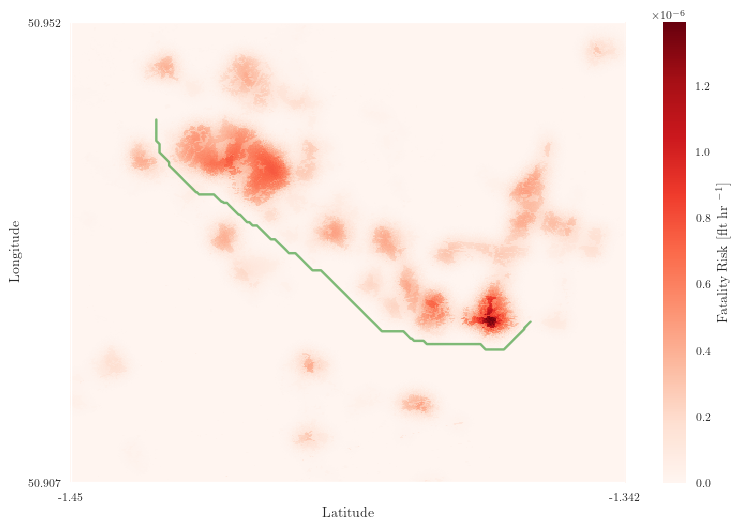

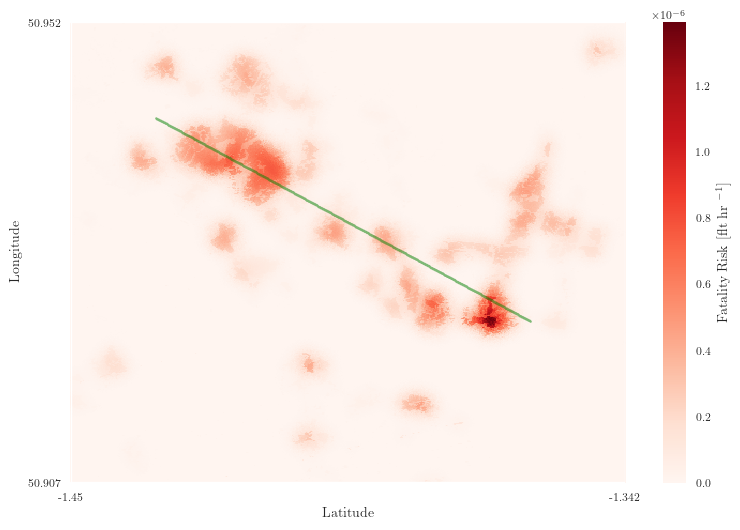

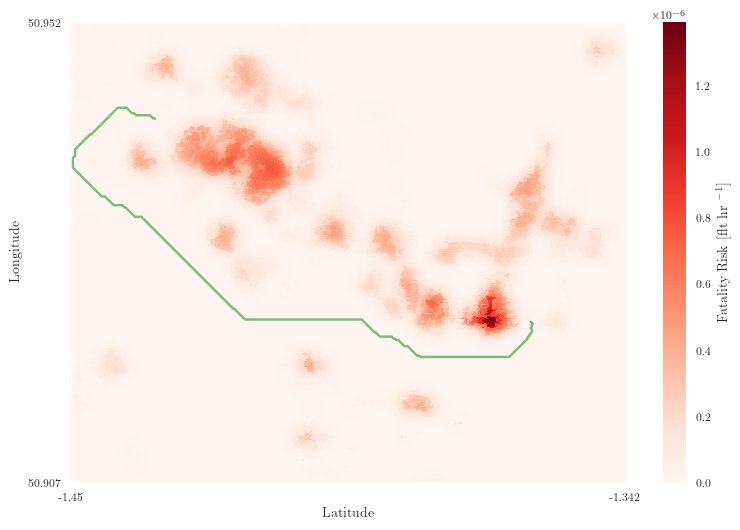

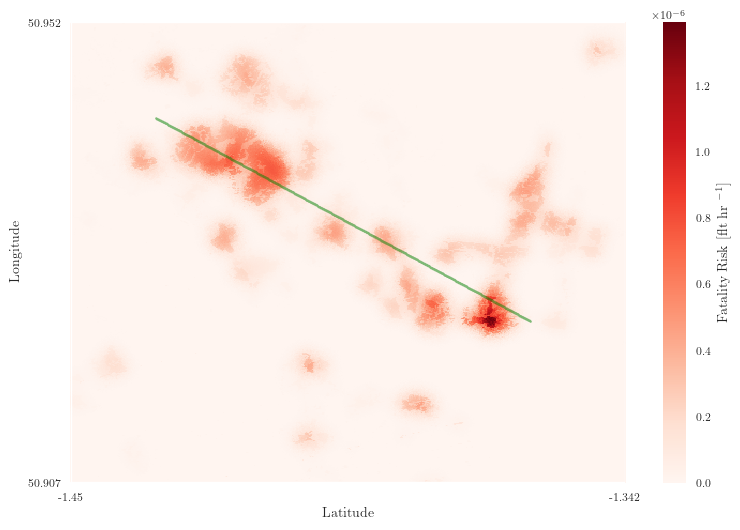

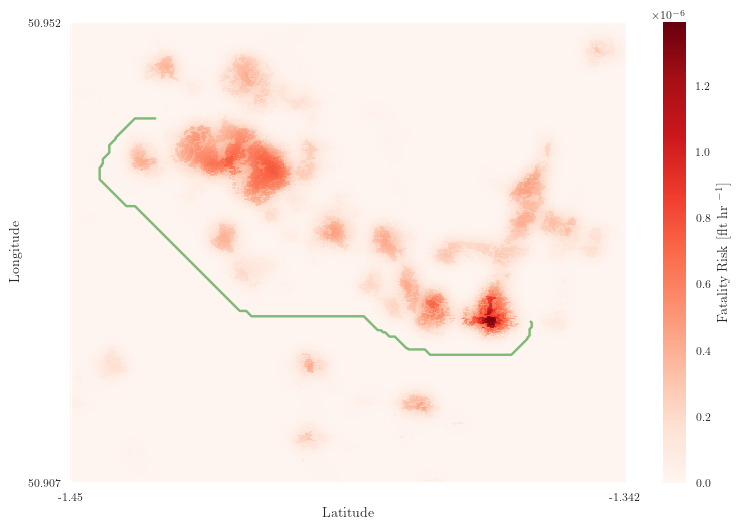

In [5]:
# Plot the real and imag path costs as stacked bar chart for each path
paths = []
start = (340, 80)
end = (150, 430)

for variant in ['current', 'tipping_point', 'future']:
    print('Running A* for ', variant)
    config.VEHICLE_VARIANT = variant
    params = {
        'variant': variant,
        'vpf': config.VALUE_PREVENTED_FATALITY,
        'cruise_speed': config.CRUISE_SPEED,
    }
    direct_params = params.copy()
    direct_params['variant'] = f'direct_{variant}'

    path, cost_real, cost_img, cumdist, time = run_a_star(costmap, start, end)
    results = {
        'path': path,
        'cost_real': cost_real,
        'cost_hvar': cost_img,
        'cost_cvar': (time / 3600) * config.VALUE_CAPITAL * config.PROB_LOSS_PER_FLT_HR,
        'cumdist': cumdist,
        'time': time,
    }
    paths.append(params | results)

    # Plot the direct path
    direct_path = make_line(*start, *end)
    direct_path = [(y, x) for x, y in direct_path]
    display_array_with_path(costmap, direct_path, cmap='Reds',
                            filename=f'figs/path_direct_{variant}_vpf{params["vpf"]}_crz{params["cruise_speed"]}.eps')
    direct_real_cost, direct_imag_cost = total_marginal_costs(costmap, Node(*start), Node(*end))
    direct_real_cost += fixed_vehicle_costs()
    direct_distance = np.sqrt((start[0] - end[0]) ** 2 + (start[1] - end[1]) ** 2) * config.MAP_RESOLUTION
    direct_time = direct_distance / config.CRUISE_SPEED
    paths.append(direct_params | {
        'path': direct_path,
        'cost_real': direct_real_cost,
        'cost_hvar': direct_imag_cost,
        'cost_cvar': (direct_time / 3600) * config.VALUE_CAPITAL * config.PROB_LOSS_PER_FLT_HR,
        'cumdist': direct_distance,
        'time': direct_time,
    })
    print('Direct path cost: £', direct_real_cost + direct_imag_cost)
    print('\t Real cost: £', direct_real_cost)
    print('\t Imaginary cost: £', direct_imag_cost)
    print('Direct path length: ', direct_distance, ' metres')
    print('Direct path time: ', direct_time, ' seconds')

    display_array_with_path(costmap, path, cmap='Reds',
                            filename=f'figs/path_{variant}_vpf{params["vpf"]}_crz{params["cruise_speed"]}.eps')
    print('Path cost: £', cost_real + cost_img)
    print('\t Real cost: £', cost_real)
    print('\t Imaginary cost: £', cost_img)
    print('Path length: ', cumdist, ' metres')
    print('Path time: ', time, ' seconds')
    print('=====================')




In [6]:
paths_df = pd.DataFrame(paths)

# Reorder to have variants in order "current", "future", "tipping point"
paths_df = paths_df.sort_values(by=['variant'], key=lambda x: x.str.contains('future').astype(int), ascending=False)
paths_df = paths_df.sort_values(by=['variant'], key=lambda x: x.str.contains('current').astype(int), ascending=False)
paths_df = paths_df.reset_index(drop=True)



# Reorder rows with "direct" in variant to be first
# paths_df = paths_df.sort_values(by=['variant'], key=lambda x: x.str.contains('direct').astype(int), ascending=False)
# paths_df = paths_df.reset_index(drop=True)

paths_df

,variant,vpf,cruise_speed,path,cost_real,cost_hvar,cost_cvar,cumdist,time
0,current,2308000,28,"[(339, 80), (338, 80), (337, 80), (336, 80), (...",67.149677,11.218541,13.975317,28174.238072,1006.222788
1,direct_current,2308000,28,"[(340, 80), (339, 81), (339, 82), (338, 83), (...",58.315631,199.540488,11.852564,23894.769302,853.384618
2,future,2308000,28,"[(340, 79), (340, 78), (340, 77), (340, 76), (...",16.589008,1.132618,17.347748,34973.060582,1249.037878
3,direct_future,2308000,28,"[(340, 80), (339, 81), (339, 82), (338, 83), (...",14.181897,199.540488,11.852564,23894.769302,853.384618
4,tipping_point,2308000,28,"[(340, 79), (340, 78), (340, 77), (341, 76), (...",4.557182,0.503215,19.024114,38352.614691,1369.736239
5,direct_tipping_point,2308000,28,"[(340, 80), (339, 81), (339, 82), (338, 83), (...",3.465027,199.540488,11.852564,23894.769302,853.384618


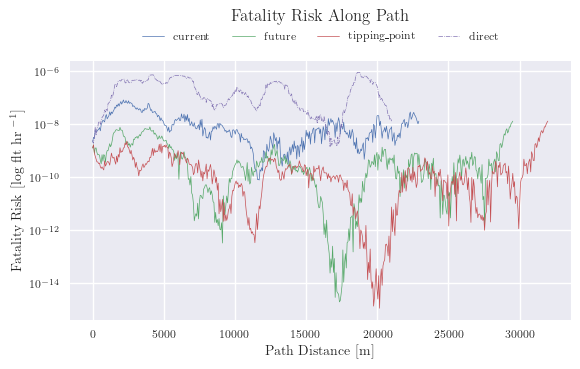

In [7]:
# Plot risks along each path
risks = []
fig, ax = plt.subplots(figsize=set_size('thesis'))
ax.set_yscale('log')
for path, variant in paths_df[~paths_df['variant'].str.contains('direct')][['path', 'variant']].values:
    risks.append([costmap[y, x] for x, y in path])
    # Plot the risk along the path
    ax.plot(range(0, len(risks[-1]) * config.MAP_RESOLUTION, config.MAP_RESOLUTION), risks[-1], label=variant, linewidth=0.5)
    ax.set_xlabel('Path Distance [m]')
    ax.set_ylabel('Fatality Risk [log flt hr $^{-1}$]')

# Plot the risk along the direct path
direct_risks = []
for path, variant in paths_df[paths_df['variant'].str.contains('direct')][['path', 'variant']].values:
    direct_risks.append([costmap[y, x] for x, y in path])
    # Plot the risk along the path
    ax.plot(range(0, len(direct_risks[-1]) * config.MAP_RESOLUTION, config.MAP_RESOLUTION), direct_risks[-1], label='direct', linewidth=0.5, linestyle='-.')
    break
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True)
plt.tight_layout()
ax.set_title('Fatality Risk Along Path', y=1.12)
plt.savefig('figs/risk_along_path.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.show()


/tmp/ipykernel_903778/974433209.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


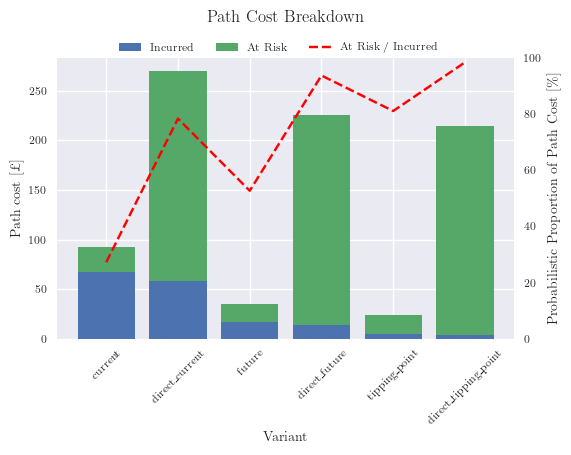

In [8]:
fig, ax1 = plt.subplots(figsize=set_size('thesis'))
ax2 = ax1.twinx()
ax2.grid(False)

# Plot the real and imag path costs as stacked bar chart for each path
costs = {
    'Incurred': [],
    'At Risk': [],
}
cost_ratio = []
variants = []
for cost_real, cost_hvar, cost_cvar, variant in paths_df[['cost_real', 'cost_hvar', 'cost_cvar', 'variant']].values:
    costs['Incurred'].append(cost_real)
    costs['At Risk'].append(cost_hvar + cost_cvar)
    cost_ratio.append(100 * (cost_hvar + cost_cvar) / (cost_real + (cost_hvar + cost_cvar)))
    variants.append(variant)

bottom = np.zeros(len(variants))
for cost_type, cost in costs.items():
    ax1.bar(variants, cost, label=cost_type, bottom=bottom)
    bottom += cost

ax2.plot(variants, cost_ratio, label='At Risk / Incurred', color='red', linestyle='--')
ax2.set_ylim(0, 100)
ax2.set_title('Path Cost Breakdown', y=1.1)

ax1.set_ylabel('Path cost [£]')
ax2.set_ylabel('Probabilistic Proportion of Path Cost [\%]')
ax1.set_xlabel('Variant')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3)
# fig.set_tight_layout(True)

# Angle the x-axis labels
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
fig.savefig('figs/path_cost_ratio.eps', format='eps', bbox_inches='tight')
fig.show()

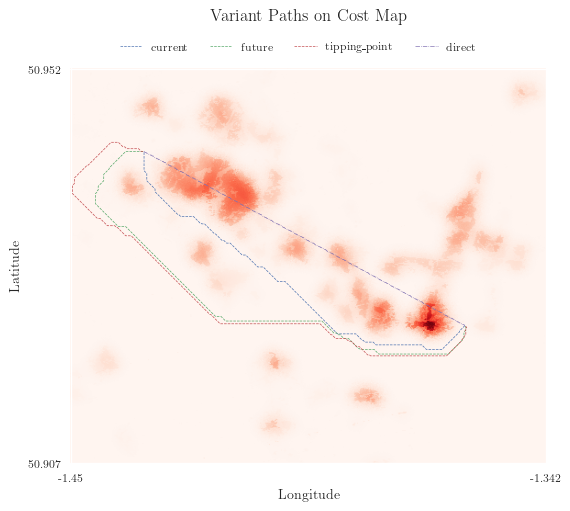

In [9]:
# Plot all of the paths on the costmap
fig, ax = plt.subplots(figsize=set_size(600))
ax.imshow(costmap.T, cmap='Reds', origin='lower')
# Plot paths without "direct" in variant
for path, variant in paths_df[~paths_df['variant'].str.contains('direct')][['path', 'variant']].values:
    ax.plot([y for x, y in path], [x for x, y in path], label=variant, linewidth=0.5, linestyle='--')


# Plot a single direct path
direct_path = paths_df[paths_df['variant'].str.contains('direct')]['path'].values[0]
ax.plot([y for x, y in direct_path], [x for x, y in direct_path], label='direct', linewidth=0.5, linestyle='-.')
    
x_labels = config.LON_BOUNDS
y_labels = config.LAT_BOUNDS
y_tick_locs = [0, costmap.shape[1]-1]
x_tick_locs = [0, costmap.shape[0]-1]

ax.tick_params(left=True, right=False,
               bottom=True, top=False, labeltop=False,
               labelleft=True, labelbottom=True)
ax.set_xticks(x_tick_locs)
ax.set_yticks(y_tick_locs)
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Variant Paths on Cost Map', y=1.1)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4)

fig.savefig('figs/variant_paths.eps', format='eps', bbox_inches='tight')